# House Prediction 

# 1. Data Description 📋

The dataset used for this analysis includes various features describing residential properties. Below are key features utilized:

1. MSSubClass: Type of dwelling.
2. MSZoning: General zoning classification.
3. LotFrontage & LotArea: Lot characteristics like size and frontage.
4. Neighborhood: Physical locations within Ames city limits.
5. OverallQual & OverallCond: Ratings of overall material and condition.
6. YearBuilt & YearRemodAdd: Construction and remodeling years.

Additional variables covering Exterior, Basement, Garage, and Sale conditions were also included for better predictive power.

Only numerical (integer and float) features with non-zero values were considered in this analysis to ensure meaningful predictions.

In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import xgboost as xgb
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


## Importing the Files

In [5]:
train_df = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
test_df = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")
Id = test_df.Id

# 2. Objective of the Analysis 🎯

The primary goal of this analysis was to predict house sale prices using machine learning models. The focus was to identify the most suitable predictive model for accurate price estimation, aiding homeowners and real estate agents in making informed decisions.

## Checking the Missing File in the Train csv

<Axes: >

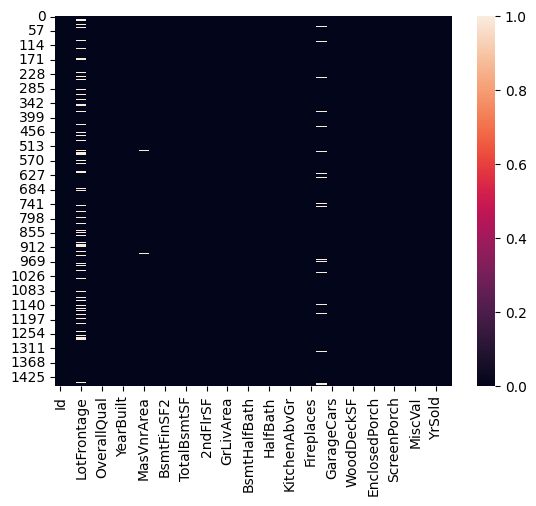

In [6]:
train_df = train_df.select_dtypes(['float64', 'int64'])
sns.heatmap(train_df.isna())

## Filling the missing file

In [7]:
mean = train_df.LotFrontage.mean()
train_df.drop(['LotFrontage'], inplace=True, axis=1)
train_df.GarageYrBlt.fillna(train_df.GarageYrBlt.mean(), inplace=True)
train_df.MasVnrArea.fillna(train_df.MasVnrArea.mean(), inplace=True)

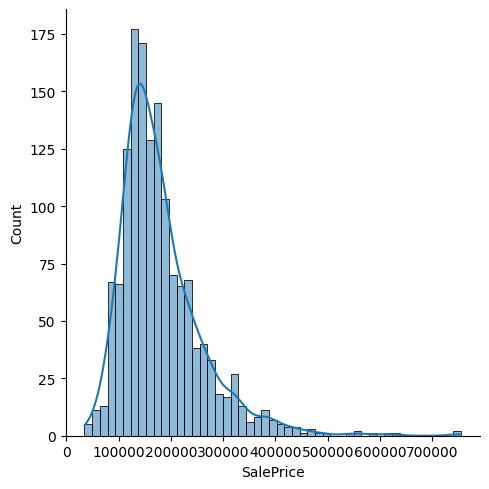

In [8]:
sns.displot(train_df['SalePrice'], kde=True)

## Now the Test File

## Testing and Fitting the Model

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor


X = (train_df.drop(['Id', 'SalePrice'], axis=1))
y = train_df['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.3)

In [10]:
test_df = test_df[X.columns]
missing_columns = test_df.columns[test_df.isna().sum() > 0]
missing_indices = [col for col in test_df.columns if test_df[col].isna().sum() > 0]
for col in missing_indices:
    test_df[col].fillna(test_df[col].mean(), inplace=True)

In [11]:
def give_insight(y_test, y_pred):
    
    print(f'Mean Square Error: {mean_squared_error(y_test, y_pred)}') 
    print(f'Root MSE: {np.sqrt(mean_squared_error(y_test, y_pred))}')
    print(f'R2 Score: {r2_score(y_test, y_pred)}') 
    plt.scatter(y_test, y_pred)
    plt.xlabel("True Values")
    plt.ylabel("Predictions")
    plt.title("True Values vs Predicted Values")
    plt.show()

In [12]:
from sklearn.linear_model import ElasticNetCV

enCV = ElasticNetCV(cv=5, n_jobs=-1)

enCV.fit(X_train, y_train)

pred = enCV.predict(X_test)

print(r2_score(y_test, pred))
print(np.sqrt(mean_squared_error(y_test, pred)))

0.6197344850489634
44318.09383742016


Mean Square Error: 1964093441.3823788
Root MSE: 44318.09383742016
R2 Score: 0.6197344850489634


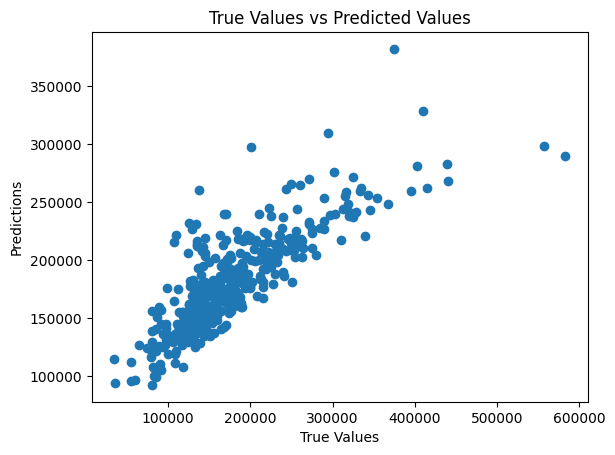

In [13]:
give_insight(y_test, pred)

In [14]:
from sklearn.ensemble import RandomForestRegressor

rf =  RandomForestRegressor()

rf.fit(X_train, y_train)

print(r2_score(y_test, rf.predict(X_test)))
print(np.sqrt(mean_squared_error(y_test, rf.predict(X_test))))


0.8717592370458942
25736.56890588308


Mean Square Error: 662370979.0472678
Root MSE: 25736.56890588308
R2 Score: 0.8717592370458942


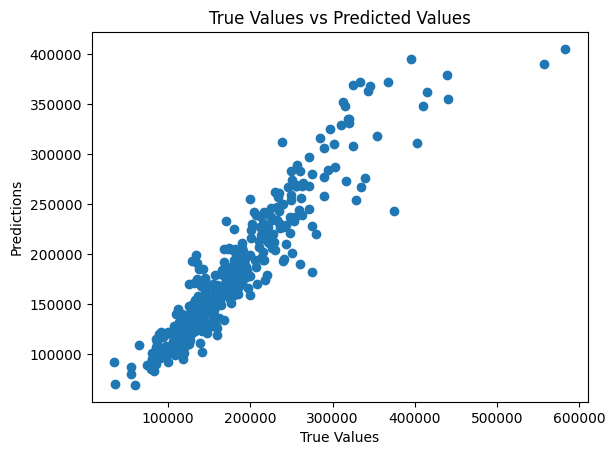

In [15]:
give_insight(y_test, rf.predict(X_test))

In [16]:
from sklearn.ensemble import AdaBoostRegressor

ar = AdaBoostRegressor()

ar.fit(X_train, y_train)

print(r2_score(y_test, ar.predict(X_test)))
print(np.sqrt(mean_squared_error(y_test, ar.predict(X_test))))

0.8009323130730253
32065.497806263444


Mean Square Error: 1028196149.5634857
Root MSE: 32065.497806263444
R2 Score: 0.8009323130730253


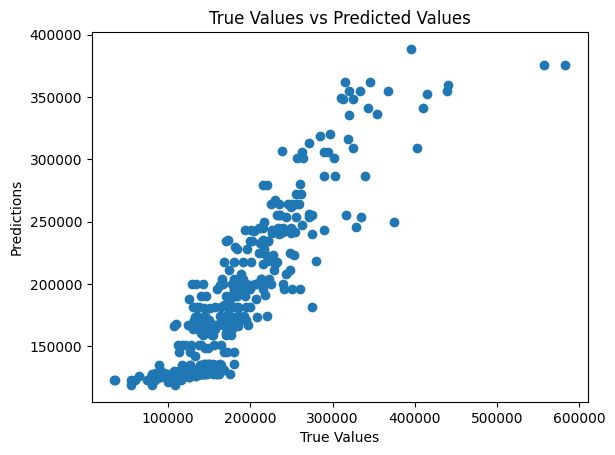

In [17]:
give_insight(y_test, ar.predict(X_test))

In [18]:
from sklearn.ensemble import HistGradientBoostingRegressor

hgbr = HistGradientBoostingRegressor()

hgbr.fit(X_train, y_train)

print(r2_score(y_test, hgbr.predict(X_test)))
print(np.sqrt(mean_squared_error(y_test, hgbr.predict(X_test))))

0.8659263507789979
26315.360057246486


Mean Square Error: 692498174.9425238
Root MSE: 26315.360057246486
R2 Score: 0.8659263507789979


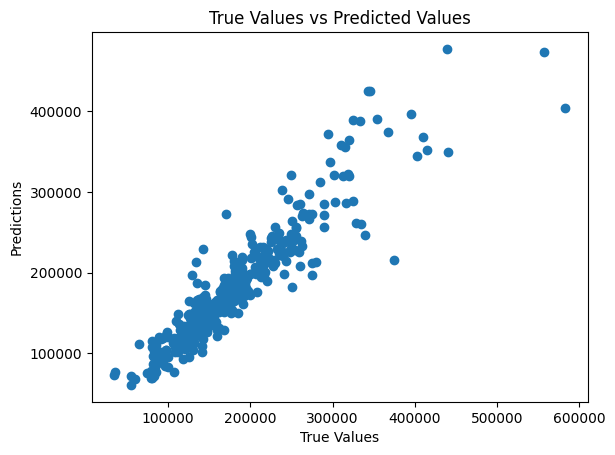

In [19]:
give_insight(y_test, hgbr.predict(X_test))

In [20]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import RidgeCV
from sklearn.svm import LinearSVR


estimators = [
    ('lr', RidgeCV()),
    ('svr', LinearSVR(random_state=42)),
    ('gbr', GradientBoostingRegressor()),
    ('hgbr', HistGradientBoostingRegressor())
]

sr = StackingRegressor(estimators=estimators, final_estimator=RandomForestRegressor())

sr.fit(X_train, y_train)


print(r2_score(y_test, sr.predict(X_test)))
print(np.sqrt(mean_squared_error(y_test, sr.predict(X_test))))

0.8780610841701493
25096.2461958451


Mean Square Error: 629821573.1224697
Root MSE: 25096.2461958451
R2 Score: 0.8780610841701493


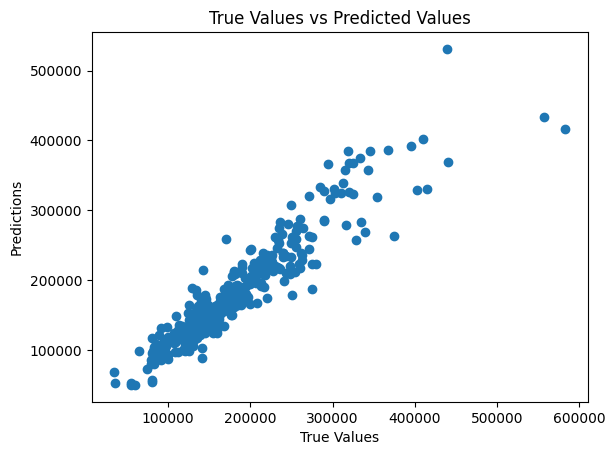

In [21]:
give_insight(y_test, sr.predict(X_test))

In [22]:
from sklearn.ensemble import ExtraTreesRegressor

etr = ExtraTreesRegressor()

etr.fit(X_train, y_train)

print(r2_score(y_test, etr.predict(X_test)))
print(np.sqrt(mean_squared_error(y_test, etr.predict(X_test))))

0.8789641073842386
25003.147918679333


Mean Square Error: 625157405.8433586
Root MSE: 25003.147918679333
R2 Score: 0.8789641073842386


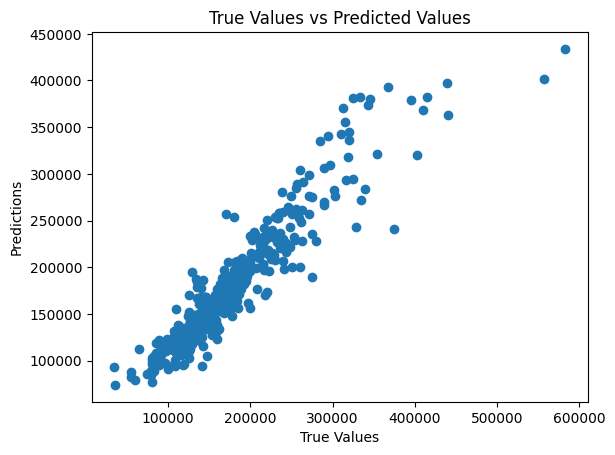

In [24]:
give_insight(y_test, etr.predict(X_test))

In [25]:
from sklearn.ensemble import VotingRegressor
lr = RidgeCV()
svr = LinearSVR(random_state=42)
gbr = GradientBoostingRegressor()
hgbr = HistGradientBoostingRegressor()
rf = RandomForestRegressor()

vr = VotingRegressor([('lr', lr), ('svr', svr), ('gbr', gbr), ('hgbr', hgbr), ('rf', rf)])

vr.fit(X_train, y_train)

print(r2_score(y_test, vr.predict(X_test)))
print(np.sqrt(mean_squared_error(y_test, vr.predict(X_test))))

0.8702565233128695
25886.919141541697


Mean Square Error: 670132582.6407179
Root MSE: 25886.919141541697
R2 Score: 0.8702565233128695


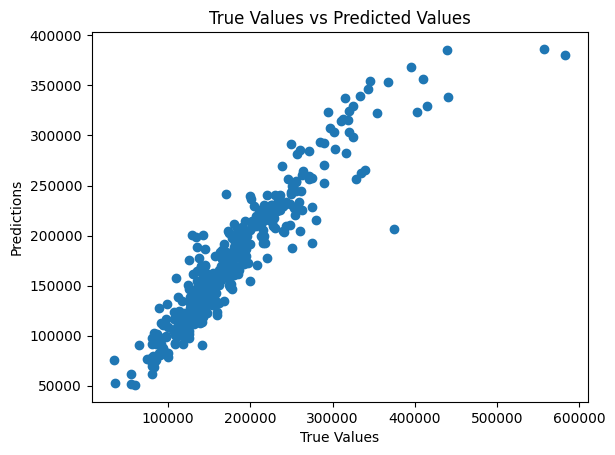

In [26]:
give_insight(y_test, vr.predict(X_test))

In [27]:
gbr = GradientBoostingRegressor()

gbr.fit(X_train, y_train)

print(r2_score(y_test, gbr.predict(X_test)))
print(np.sqrt(mean_squared_error(y_test, gbr.predict(X_test))))

0.8829384370391394
24589.2204563606


Mean Square Error: 604629762.6515026
Root MSE: 24589.2204563606
R2 Score: 0.8829384370391394


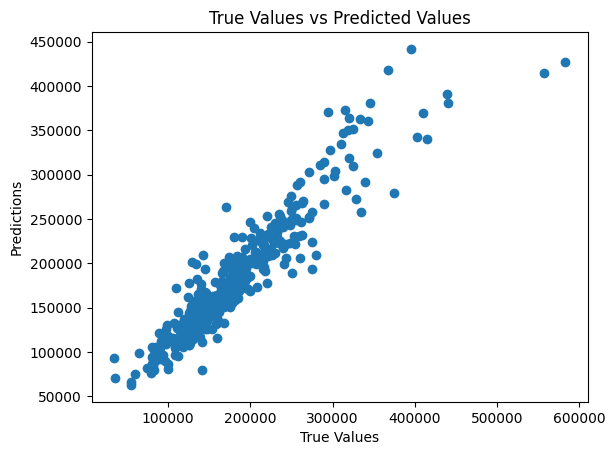

In [28]:
give_insight(y_test, gbr.predict(X_test))

In [29]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor


param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

grid = GridSearchCV(XGBRegressor(objective='reg:squarederror'), param_grid, cv=5)
grid.fit(X_train, y_train)
print(f"Best parameters: {grid.best_params_}")

Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}


# 3. Model Variations and Best Performing Model 🤖

Several classifier models were tested to achieve the objective:

1. XGBoost: Implemented with GridSearchCV for hyperparameter tuning, which provided the best results.

Additional models, such as Gradient Boosting, Random Forest, and Linear Regression, were also evaluated for comparison.
The XGBoost model emerged as the best-performing model due to its ability to handle complex relationships in the data and deliver robust predictions.

In [30]:
best_params = grid.best_params_
model = XGBRegressor(objective='reg:squarederror', **best_params)

model.fit(X, y)

# print(r2_score(y_test, model.predict(X_test)))
# print(np.sqrt(mean_squared_error(y_test, model.predict(X_test))))

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=50, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

## Ending

# 4. Key Findings 🔑

The most significant predictors of house prices were OverallQual, GrLivArea, YearBuilt, and 
Neighborhood.

XGBoost, with optimized parameters, achieved a high R² score and low RMSE, outperforming other models.

Properties with higher quality ratings, newer construction/remodel years, and larger living areas tend 
to have significantly higher prices.abs

In [31]:
pred = model.predict(test_df)

In [32]:
output = pd.DataFrame({"Id": Id, "SalePrice": pred})
output.to_csv("submission.csv", index=False)
print("Submit Successfully")

Submit Successfully


# 5. Flaws in the Model and Future Directions ⚠️🔍

## Potential Flaws:
1. Missing data: Some features like LotFrontage had missing values that were imputed, potentially affecting model accuracy.
2. Bias in features: Categorical variables might not fully capture the variability in property value.
## Future Plan:
1. Collect additional data, especially for underrepresented neighborhoods and dwelling types.
2. Explore advanced feature engineering techniques, such as polynomial features or embedding layers for categorical variables.
        Evaluate deep learning models or ensemble techniques for further performance improvements.